This is the exploration of the Euroleague dataset.
First, we need to do our imports.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

Let's first take a look at the overall structure of the Euroleague, taking a look at the teams.

In [2]:
path = os.path.dirname(os.getcwd())

In [3]:
teams = pd.read_csv(path+'/data/teams.csv')
points = pd.read_csv(path+'/data/points.csv')
players = pd.read_csv(path+'/data/players.csv')
playplay = pd.read_csv(path+'/data/play_by_play.csv')
header = pd.read_csv(path+'/data/header.csv')
compare = pd.read_csv(path+'/data/comparison.csv')
boxscore = pd.read_csv(path+'/data/box_score.csv')
#teams = teams.drop(columns=['season_team_id'])

for season in teams['season_code'].unique():
    run = False
    if run:
        year = int(season[1:])
        teams = teams.replace(season,year)

In [14]:
teams

,season_code,team_id,games_played,minutes,points,two_points_made,two_points_attempted,three_points_made,three_points_attempted,free_throws_made,...,defensive_rebounds_per_game,total_rebounds_per_game,assists_per_game,steals_per_game,turnovers_per_game,blocks_favour_per_game,blocks_against_per_game,fouls_committed_per_game,fouls_received_per_game,valuation_per_game
0,E2007,ARI,20.0,805.0,1502,381,773,142,395,314,...,20.20,30.10,10.60,9.15,13.35,2.60,3.05,21.05,22.00,73.75
1,E2007,BAM,14.0,559.1,879,210,421,100,292,159,...,21.71,27.57,11.50,5.71,15.71,1.79,2.57,22.14,19.36,53.29
2,E2007,BAR,23.0,919.8,1708,483,895,150,514,292,...,23.26,33.87,14.26,9.39,12.74,3.78,2.87,19.65,19.52,81.57
3,E2007,BAS,25.0,1005.0,2066,528,937,204,534,398,...,23.60,32.32,13.32,7.96,12.64,2.60,2.68,20.20,21.44,89.16
4,E2007,CIB,14.0,560.0,1080,281,524,106,295,200,...,19.50,27.07,10.00,9.29,14.43,1.43,3.50,23.29,19.71,68.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,E2022,RED,24.0,970.0,1815,460,843,189,578,328,...,22.92,33.46,16.50,6.17,12.67,1.75,2.58,22.12,20.33,80.46
332,E2022,TEL,24.0,960.0,1979,529,971,206,599,303,...,22.12,34.79,15.58,6.42,11.46,3.33,2.17,21.83,18.67,87.79
333,E2022,ULK,23.0,929.0,1927,493,861,220,598,281,...,22.70,34.35,18.26,6.91,13.04,1.52,2.35,20.96,20.30,91.35
334,E2022,VIR,24.0,965.0,1867,459,842,198,543,355,...,22.92,31.42,19.00,7.17,14.12,2.04,2.17,21.42,20.38,85.62


In [16]:
points

,game_point_id,game_id,game,round,phase,season_code,number_of_play,team_id,player_id,player,...,coord_y,zone,fastbreak,second_chance,points_off_turnover,minute,console,points_a,points_b,timestamp
0,2007_001_002,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,2,BAS,PCBX,PRIGIONI_ PABLO,...,479,G,NaN,NaN,NaN,1,09:00,0,3,1970-01-01
1,2007_001_004,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,4,OLY,PTFV,WOODS_ QYNTEL,...,451,I,NaN,NaN,NaN,1,09:00,0,3,1970-01-01
2,2007_001_008,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,8,OLY,PCBV,MACIJAUSKAS_ ARVYDAS,...,17,D,NaN,NaN,NaN,1,09:00,2,3,1970-01-01
3,2007_001_010,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,10,BAS,PCBY,SPLITTER_ TIAGO,...,33,C,NaN,NaN,NaN,2,08:00,2,5,1970-01-01
4,2007_001_012,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,12,OLY,P000126,JACKSON_ MARC,...,76,C,NaN,NaN,NaN,2,08:00,2,5,1970-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572555,2022_216_608,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,608,PAM,P010568,JONES_ CHRIS,...,-1,NaN,0.0,0.0,0.0,40,00:47,88,88,2023-02-10 21:06:49
572556,2022_216_609,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,609,PAM,P010568,JONES_ CHRIS,...,-1,NaN,0.0,0.0,0.0,40,00:47,88,89,2023-02-10 21:07:07
572557,2022_216_613,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,613,PAN,P011225,LEE_ PARIS,...,69,C,0.0,0.0,0.0,40,00:42,90,89,2023-02-10 21:09:26
572558,2022_216_631,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,631,PAN,P008967,THOMAS_ MATT,...,-1,NaN,0.0,0.0,0.0,40,00:17,91,89,2023-02-10 21:13:00


In [17]:
players

,season_player_id,season_code,player_id,player,team_id,games_played,games_started,minutes,points,two_points_made,...,defensive_rebounds_per_game,total_rebounds_per_game,assists_per_game,steals_per_game,turnovers_per_game,blocks_favour_per_game,blocks_against_per_game,fouls_committed_per_game,fouls_received_per_game,valuation_per_game
0,2021_P003733_MAD,E2021,P003733,ABALDE_ ALBERTO,MAD,30.0,19.0,563.4,179,40,...,2.30,2.97,1.47,0.47,1.10,0.00,0.07,1.87,1.17,5.43
1,2022_P003733_MAD,E2022,P003733,ABALDE_ ALBERTO,MAD,18.0,8.0,266.5,48,8,...,1.67,2.06,1.78,0.39,0.39,0.00,0.11,1.78,0.78,3.00
2,2020_P003733_MAD,E2020,P003733,ABALDE_ ALBERTO,MAD,39.0,23.0,761.2,281,47,...,2.38,2.67,2.33,0.54,0.97,0.00,0.15,1.54,1.46,8.33
3,2019_P003733_PAM,E2019,P003733,ABALDE_ ALBERTO,PAM,23.0,4.0,499.3,179,49,...,2.61,4.00,1.65,0.48,0.83,0.00,0.35,1.26,1.74,8.91
4,2017_P003733_PAM,E2017,P003733,ABALDE_ ALBERTO,PAM,25.0,9.0,478.5,190,43,...,1.60,2.08,1.68,0.32,1.28,0.00,0.20,1.76,1.44,6.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5330,2007_PADX_ZAL,E2007,PADX,ZUKAUSKAS_ EURELJUS,ZAL,19.0,19.0,344.9,68,28,...,3.11,4.42,0.84,0.32,1.42,1.42,0.32,2.32,1.58,5.32
5331,2007_PLHD_LJU,E2007,PLHD,ZUPAN_ MIHA,LJU,13.0,0.0,206.8,85,23,...,1.77,3.08,0.38,0.46,1.31,0.23,0.46,2.85,1.62,3.92
5332,2008_PLHD_LJU,E2008,PLHD,ZUPAN_ MIHA,LJU,10.0,6.0,219.8,68,15,...,2.70,4.70,0.90,0.60,0.80,0.10,0.70,2.10,1.70,7.10
5333,2008_PKON_BER,E2008,PKON,ZWIENER_ PHILLIP,BER,3.0,0.0,11.4,0,0,...,0.67,0.67,0.00,0.00,0.33,0.00,0.00,0.67,0.00,-0.67


In [19]:
playplay

,game_play_id,game_id,game,round,phase,season_code,quarter,type,number_of_play,team_id,...,play_type,player,team,dorsal,minute,marker_time,points_a,points_b,comment,play_info
0,2007_001_002,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,q1,0,2,BAS,...,3FGM,PRIGIONI_ PABLO,BASKONIA,5.0,1,09:00,0,3,NaN,Three Pointer (1/1 - 3 pt)
1,2007_001_003,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,q1,0,3,BAS,...,AS,SPLITTER_ TIAGO,BASKONIA,21.0,1,09:00,0,0,NaN,Assist (1)
2,2007_001_004,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,q1,0,4,OLY,...,2FGA,WOODS_ QYNTEL,OLYMPIACOS PIRAEUS B.C.,6.0,1,09:00,0,0,NaN,Missed Two Pointer (0/1 - 0 pt)
3,2007_001_005,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,q1,0,5,BAS,...,D,TELETOVIC_ MIRZA,BASKONIA,12.0,1,09:00,0,0,NaN,Def Rebound (1)
4,2007_001_006,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,q1,0,6,BAS,...,TO,SPLITTER_ TIAGO,BASKONIA,21.0,1,09:00,0,0,NaN,Turnover (1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1972311,2022_216_631,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,q4,0,631,PAN,...,FTM,THOMAS_ MATT,Panathinaikos Athens,17.0,40,00:17,91,89,NaN,Free Throw In (3/5 - 13 pt)
1972312,2022_216_632,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,q4,0,632,PAM,...,TOUT,0,Valencia Basket,NaN,40,00:17,0,0,NaN,Time Out (2)
1972313,2022_216_633,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,q4,0,633,PAM,...,TO,PREPELIC_ KLEMEN,Valencia Basket,3.0,40,00:22,0,0,NaN,Turnover (2)
1972314,2022_216_634,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,q4,0,634,PAM,...,3FGM,JONES_ CHRIS,Valencia Basket,7.0,40,00:00,91,92,NaN,Three Pointer (2/3 - 24 pt)


In [20]:
header

,game_id,game,date,time,round,phase,season_code,score_a,score_b,team_a,...,score_quarter_1_b,score_quarter_2_b,score_quarter_3_b,score_quarter_4_b,score_extra_time_1_a,score_extra_time_2_a,score_extra_time_3_a,score_extra_time_1_b,score_extra_time_2_b,score_extra_time_3_b
0,2007_001,OLY-BAS,2007-10-25,20:30:00,1,REGULAR SEASON,E2007,95,90,OLYMPIACOS PIRAEUS B.C.,...,20,37,65,90,NaN,NaN,NaN,NaN,NaN,NaN
1,2007_002,VIR-ZAL,2007-10-24,20:30:00,1,REGULAR SEASON,E2007,81,75,VIRTUS VIDIVICI BOLOGNA,...,21,39,61,75,NaN,NaN,NaN,NaN,NaN,NaN
2,2007_003,SOP-CSK,2007-10-22,20:15:00,1,REGULAR SEASON,E2007,69,88,PROKOM TREFL SOPOT,...,13,45,69,88,NaN,NaN,NaN,NaN,NaN,NaN
3,2007_004,SIE-LJU,2007-10-24,20:30:00,1,REGULAR SEASON,E2007,80,52,MONTEPASCHI,...,18,26,41,52,NaN,NaN,NaN,NaN,NaN,NaN
4,2007_005,ARI-MAL,2007-10-24,20:45:00,1,REGULAR SEASON,E2007,87,83,ARIS THESSALONIKI,...,23,39,65,83,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,2022_211,MUN-PAR,2023-02-09,20:30:00,24,REGULAR SEASON,E2022,71,82,FC BAYERN MUNICH,...,19,39,60,82,NaN,NaN,NaN,NaN,NaN,NaN
3858,2022_212,VIR-BAR,2023-02-09,20:30:00,24,REGULAR SEASON,E2022,75,92,VIRTUS SEGAFREDO BOLOGNA,...,22,47,74,92,NaN,NaN,NaN,NaN,NaN,NaN
3859,2022_214,MCO-ASV,2023-02-10,19:00:00,24,REGULAR SEASON,E2022,87,75,AS MONACO,...,21,40,63,75,NaN,NaN,NaN,NaN,NaN,NaN
3860,2022_215,ZAL-BAS,2023-02-10,19:00:00,24,REGULAR SEASON,E2022,79,75,ZALGIRIS KAUNAS,...,18,42,60,75,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
compare

,game_id,game,round,phase,season_code,team_id_a,team_id_b,fast_break_points_a,fast_break_points_b,turnover_points_a,...,minute_prev_b,prev_b,minute_str_b,str_b,max_lead_a,max_lead_b,minute_max_lead_a,minute_max_lead_b,points_max_lead_a,points_max_lead_b
0,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,OLY,BAS,0,0,0,...,22,60-42,24,60-52,21,3,21,1,58-37,0-3
1,2007_002,VIR-ZAL,1,REGULAR SEASON,E2007,VIR,ZAL,0,0,0,...,13,26-25,14,26-33,6,8,39,5,75-69,7-15
2,2007_003,SOP-CSK,1,REGULAR SEASON,E2007,SOP,CSK,0,0,0,...,8,16-9,11,16-19,7,26,8,36,16-9,58-84
3,2007_004,SIE-LJU,1,REGULAR SEASON,E2007,SIE,LJU,0,0,0,...,6,16-8,8,16-15,30,0,35,0,74-44,0
4,2007_005,ARI-MAL,1,REGULAR SEASON,E2007,ARI,MAL,0,0,0,...,5,16-13,6,16-19,8,8,14,29,31-23,55-63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3857,2022_211,MUN-PAR,24,REGULAR SEASON,E2022,MUN,PAR,2,2,9,...,24,39-45,28,39-54,3,20,14,33,26-23,47-67
3858,2022_212,VIR-BAR,24,REGULAR SEASON,E2022,VIR,BAR,4,2,15,...,12,23-24,19,23-45,0,37,0,26,0,31-68
3859,2022_214,MCO-ASV,24,REGULAR SEASON,E2022,MCO,ASV,4,2,19,...,28,67-57,30,67-63,15,0,39,0,87-72,0
3860,2022_215,ZAL-BAS,24,REGULAR SEASON,E2022,ZAL,BAS,5,4,5,...,30,61-58,32,61-64,5,4,26,16,54-49,28-32


This features every team from 2007 to 2022, so let's start by looking at all the teams by each year.

In [6]:
#allyear = teams.drop(columns=['team_id','season_team_id',]).groupby('season_code')

for season in teams['season_code'].unique():
    year = int(season[1:])
    teams = teams.replace(season,year)

,season_code,team_id,games_played,minutes,points,two_points_made,two_points_attempted,three_points_made,three_points_attempted,free_throws_made,...,defensive_rebounds_per_game,total_rebounds_per_game,assists_per_game,steals_per_game,turnovers_per_game,blocks_favour_per_game,blocks_against_per_game,fouls_committed_per_game,fouls_received_per_game,valuation_per_game
0,E2007,ARI,20.0,805.0,1502,381,773,142,395,314,...,20.20,30.10,10.60,9.15,13.35,2.60,3.05,21.05,22.00,73.75
1,E2007,BAM,14.0,559.1,879,210,421,100,292,159,...,21.71,27.57,11.50,5.71,15.71,1.79,2.57,22.14,19.36,53.29
2,E2007,BAR,23.0,919.8,1708,483,895,150,514,292,...,23.26,33.87,14.26,9.39,12.74,3.78,2.87,19.65,19.52,81.57
3,E2007,BAS,25.0,1005.0,2066,528,937,204,534,398,...,23.60,32.32,13.32,7.96,12.64,2.60,2.68,20.20,21.44,89.16
4,E2007,CIB,14.0,560.0,1080,281,524,106,295,200,...,19.50,27.07,10.00,9.29,14.43,1.43,3.50,23.29,19.71,68.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,E2022,RED,24.0,970.0,1815,460,843,189,578,328,...,22.92,33.46,16.50,6.17,12.67,1.75,2.58,22.12,20.33,80.46
332,E2022,TEL,24.0,960.0,1979,529,971,206,599,303,...,22.12,34.79,15.58,6.42,11.46,3.33,2.17,21.83,18.67,87.79
333,E2022,ULK,23.0,929.0,1927,493,861,220,598,281,...,22.70,34.35,18.26,6.91,13.04,1.52,2.35,20.96,20.30,91.35
334,E2022,VIR,24.0,965.0,1867,459,842,198,543,355,...,22.92,31.42,19.00,7.17,14.12,2.04,2.17,21.42,20.38,85.62


In [10]:
teams

,season_code,team_id,games_played,minutes,points,two_points_made,two_points_attempted,three_points_made,three_points_attempted,free_throws_made,...,defensive_rebounds_per_game,total_rebounds_per_game,assists_per_game,steals_per_game,turnovers_per_game,blocks_favour_per_game,blocks_against_per_game,fouls_committed_per_game,fouls_received_per_game,valuation_per_game
0,2007,ARI,20.0,805.0,1502,381,773,142,395,314,...,20.20,30.10,10.60,9.15,13.35,2.60,3.05,21.05,22.00,73.75
1,2007,BAM,14.0,559.1,879,210,421,100,292,159,...,21.71,27.57,11.50,5.71,15.71,1.79,2.57,22.14,19.36,53.29
2,2007,BAR,23.0,919.8,1708,483,895,150,514,292,...,23.26,33.87,14.26,9.39,12.74,3.78,2.87,19.65,19.52,81.57
3,2007,BAS,25.0,1005.0,2066,528,937,204,534,398,...,23.60,32.32,13.32,7.96,12.64,2.60,2.68,20.20,21.44,89.16
4,2007,CIB,14.0,560.0,1080,281,524,106,295,200,...,19.50,27.07,10.00,9.29,14.43,1.43,3.50,23.29,19.71,68.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2022,RED,24.0,970.0,1815,460,843,189,578,328,...,22.92,33.46,16.50,6.17,12.67,1.75,2.58,22.12,20.33,80.46
332,2022,TEL,24.0,960.0,1979,529,971,206,599,303,...,22.12,34.79,15.58,6.42,11.46,3.33,2.17,21.83,18.67,87.79
333,2022,ULK,23.0,929.0,1927,493,861,220,598,281,...,22.70,34.35,18.26,6.91,13.04,1.52,2.35,20.96,20.30,91.35
334,2022,VIR,24.0,965.0,1867,459,842,198,543,355,...,22.92,31.42,19.00,7.17,14.12,2.04,2.17,21.42,20.38,85.62


In [22]:
boxscore

,game_player_id,game_id,game,round,phase,season_code,player_id,is_starter,is_playing,team_id,...,defensive_rebounds,total_rebounds,assists,steals,turnovers,blocks_favour,blocks_against,fouls_committed,fouls_received,valuation
0,2007_001_OLY,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,OLY,0.0,1.0,OLY,...,27,34,16,10,11,6,1,17,21,116
1,2007_001_PACJ,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,PACJ,0.0,1.0,OLY,...,0,0,0,0,0,0,0,2,0,-2
2,2007_001_PTFV,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,PTFV,1.0,1.0,OLY,...,4,5,2,0,3,0,0,2,2,17
3,2007_001_PAJK,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,PAJK,0.0,1.0,BAS,...,1,1,3,1,0,0,0,1,3,10
4,2007_001_PAFP,2007_001,OLY-BAS,1,REGULAR SEASON,E2007,PAFP,0.0,1.0,BAS,...,4,4,3,0,1,0,1,3,4,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98820,2022_216_P011442,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,P011442,0.0,0.0,PAN,...,0,0,0,0,0,0,0,0,0,0
98821,2022_216_P008967,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,P008967,0.0,1.0,PAN,...,2,4,0,3,2,0,0,1,5,14
98822,2022_216_P006586,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,P006586,1.0,1.0,PAN,...,0,0,1,2,0,2,0,1,0,8
98823,2022_216_P004429,2022_216,PAN-PAM,24,REGULAR SEASON,E2022,P004429,0.0,1.0,PAN,...,1,1,0,1,0,1,0,4,1,-2


Text(0.5, 1.0, 'points scored by teams each season')

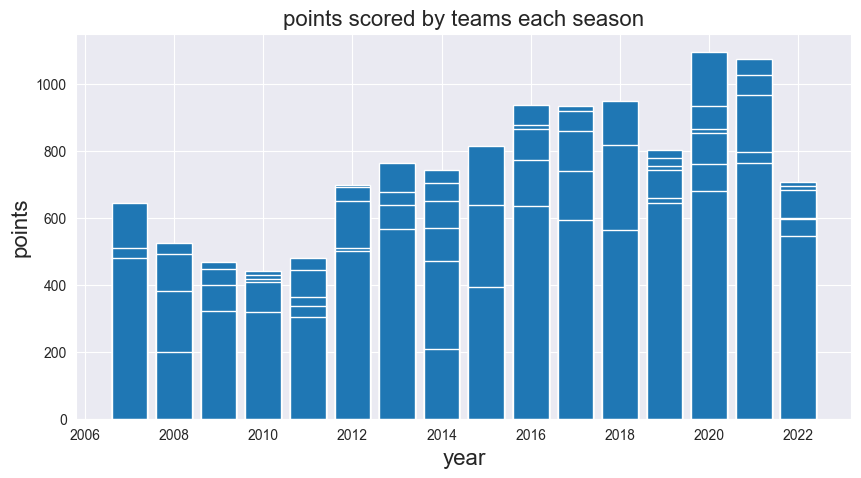

In [12]:
plt.figure(figsize=(10,5))
plt.bar(teams['season_code'],teams['games_played'])
plt.xlabel("year", fontsize=16)
plt.ylabel("points", fontsize=16)
plt.title("points scored by teams each season", fontsize=16)

In [32]:
allyear ['points'].dtype

season_code
E2007    int64
E2008    int64
E2009    int64
E2010    int64
E2011    int64
E2012    int64
E2013    int64
E2014    int64
E2015    int64
E2016    int64
E2017    int64
E2018    int64
E2019    int64
E2020    int64
E2021    int64
E2022    int64
Name: points, dtype: object

In [13]:
g = sns.PairGrid(teams)
g.map(sns.scatterplot)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1566c3880> (for post_execute):


KeyboardInterrupt: 